Data Collection

In [1]:
# Step 1: Clone the repository
!git clone https://github.com/KabirAhmad4/KICS--Text-Classification---NLP.git





Cloning into 'KICS--Text-Classification---NLP'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 938.17 KiB | 2.25 MiB/s, done.


Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv(r"/content/KICS--Text-Classification---NLP/dataset/train.csv")
df

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [5]:
data = df[:1000]
data.shape

(1000, 3)

In [6]:
docs = list(data['Comment'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [7]:
X = docs
y = data['Topic']
print(X.shape, y.shape)

(1000, 5813) (1000,)


In [8]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

(800, 5813) (800,)
(200, 5813) (200,)


In [9]:
def update(cat):
    if cat == "Biology":
        return 1
    elif cat == "Chemistry":
        return 0
    elif cat == "Physics" :
        return 2
    return cat
df.loc[:, "Topic"] = df["Topic"].apply(update)
df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,1
1,0xbf0,Is it so hard to believe that there exist part...,2
2,0x1dfc,There are bees,1
3,0xc7e,I'm a medication technician. And that's alot o...,1
4,0xbba,Cesium is such a pretty metal.,0


In [10]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.9525
Testing Accuracy score: 0.5


In [11]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.47      0.85      0.60        82
           1       0.62      0.31      0.41        65
           2       0.56      0.19      0.28        53

    accuracy                           0.50       200
   macro avg       0.55      0.45      0.43       200
weighted avg       0.54      0.50      0.46       200



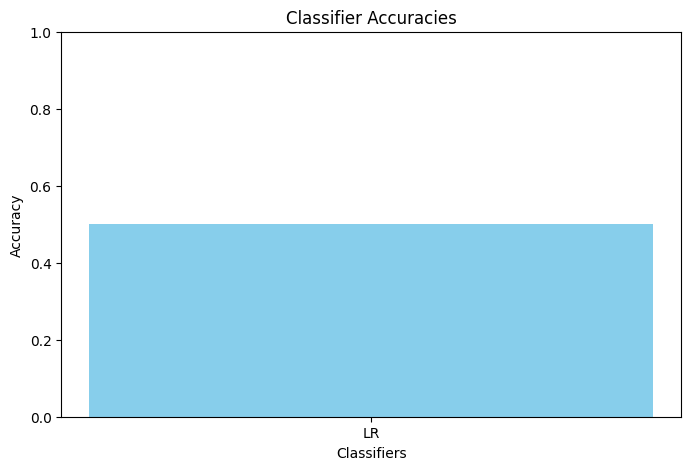

In [12]:
import matplotlib.pyplot as plt

classifiers = ['LR']
accuracies = [lr_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.ylim(0, 1)
plt.show()